# EXPLORING CRASH DATA AND PREDICTING SEVERITY

## Table of contents

* [Introduction](#Introduction)

* [Business Understanding](#business-understanding)

* [Problem Statement](#problem-statement)

* [Data Understanding](#data-understanding)

    * [Dataset 1: CRASH Data](#Dataset-1:CRASH-Data)

    * [Dataset 2: Vehicles Data](#Dataset-2:-Vehicles-Data)

    * [Dataset 3: People Data](#Dataset-3:-People-Data)

* [Importing Libraries](#Importing-Libraries)

* [Reading The Datasets](#Reading-The-Datasets)

* [Combining The datasets](#Combining-The-datasets)

* [Data Cleaning](#data-Cleaning)

    * [Dropping Redundant columns](#Dropping-Redundant-columns)

    * [Dropping Irrelevant columns](#Dropping-Irrelevant-Columns)

    * [Handling missing values](#Handling-missing-values)

* [Exploratory Data Analysis](#Exploratory-Data-Analysis)

    * [Univariate analysis](#univariate-analysis)

    * [Bivariate analysis](#bivariate-analysis)

    * [Multivariate analysis](#multivariate-analysis)

* [Modeling](#Modeling)

    * [Model 1](#Model-1)

    * [Model 2](#Model-2)

    * [Model 3](#Model-3)


* [Conclusions](#Conclusions)

* [Recommendation](#recommendations)

# Introduction

Vehicle accidents are a major source of worry for public safety and transportation agencies. They not only cause death and property damage, but also interrupt traffic flow and incur economic losses. Understanding the factors that contribute to these collisions and their effects is critical for putting effective measures in place to decrease their occurrence and impact.

The City of Chicago has collected extensive crash data through its electronic crash reporting system (E-Crash), providing a valuable resource to analyse and gain insights into the factors contributing to accidents. The dataset comprises a wide range of crash parameters, including crash circumstances, vehicles involved, and people affected.

The goal of this study is to analyse the dataset and provide a full understanding of car crashes and their characteristics in the city of Chicago. We hope to discover key factors that contribute to collisions, measure the impact they have, and analyse the circumstances surrounding the accidents by studying the numerous characteristics associated with each crash event.

This project's target audience includes numerous road safety stakeholders such as transportation authorities, law enforcement agencies, policymakers, and insurance companies. Decision-makers can establish focused plans and activities to reduce the frequency and severity of accidents by knowing the fundamental elements that contribute to collisions.

# Business Understanding

The city of Chicago maintains an electronic crash reporting system (E-Crash) which shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD). Data from the CPD's electronic crash reporting system (E-Crash) are displayed without any identifying information. When a crash report is completed or when an existing report in E-Crash receives updates, records are added to the data portal. The drivers involved in most minor incidents self-report about half of all crash reports to the police station, while the other half are documented on the scene by the responding police officer. The reporting officer records several crash parameters, such as information on street conditions, weather, and posted speed restrictions, based on the best information at the moment, but many of these may conflict with posted data or other assessments of road conditions.

The dataset offers useful information for evaluating traffic incidents, spotting patterns, and putting safety measures in place to lower casualties and improve road safety. This information can be used by researchers, decision-makers, and analysts to make more informed choices and enhance overall road transportation systems. The goal of this research is to create a categorization model that will aid in determining the characteristics of an automobile collision that are significant.

# Problem statement

Traffic accidents occur due to various factors, including vehicle characteristics, driver behavior, road conditions, weather, and traffic patterns. The Vehicle Safety Board and the City of Chicago who are the stakeholder recognize the importance of identifying and understanding the various factors leading to the accidents in order to implement targeted safety interventions and improve overall road safety.
From the several factors our primary objective that we aim to achieve are:
 
* To develop a model that can accurately determine the primary cause of car accidents by utilizing data, on vehicles, individuals and road conditions
*  To recommend to the City of Chicago Department of Transportation proactive measures to mitigate the risks, injuries and enhance overall road safety.

# Data Understanding

We will make use of datasets from the Chicago Data Portal, an open data resource where one may find relevant information about the city. In particular we will be focusing on three datasets:Traffic Crashes - Vehicles, Traffic Crashes - People and Traffic Crashes - Crashes. 


 
### Dataset 1: CRASH Data
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.  

* CRASH_DATE:Date and time of crash as entered by the reporting officer

* WEATHER_CONDITION:Weather condition at time of crash, as determined by reporting officer

* ROADWAY_SURFACE_COND:Road surface condition, as determined by reporting officer

* CRASH_TYPE:A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

The full description of the columns can be found in the data_description.md file.

Insights:When the weather is clear throughout the day, accidents tend to occur more frequently.



### Dataset 2: Vehicles Data
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset. 

* CRASH_UNIT_ID: A unique identifier for each vehicle record.

* MAKE:The make (brand) of the vehicle, if relevant

* VEHICLE_USE: The normal use of the vehicle, if relevant

* EXCEED_SPEED_LIMIT_I:Indicator of whether the unit was speeding, as determined by the reporting officer

The full description of the columns can be found in the data_description.md file.

Insights: 
Passanger vehicles used for personal use are more prone to accidents.We can also see that toyota and chevrolet makes are leading in number of accidents with 118 and 114 respectfully.



### Dataset 3: People Data
Description of Columns:  
Some of the columns found in the dataset are:

* 'CRASH_RECORD_ID':This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.  

* PERSON_ID:A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.).

* PERSON_TYPE: Type of roadway user involved in crash

* SEX: Gender of person involved in crash, as determined by reporting officer

* AGE: Age of person involved in crash

The full description of the columns can be found in the data_description.md file.

Insights:
Drivers are more prone to be affected with the accidents with 731 cases.
Most victims are Males.
The most affected age group is between 26-30.

## Importing Libraries

In this section, we begin by importing the necessary Python libraries and modules. These tools provide essential functions and capabilities that we will utilize throughout the analysis.

In [1]:
# Basic data manipultion and analysis
import pandas as pd
import numpy as np
# Data visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Model Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
# Handling Class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import Pipeline
#making map visuals
import folium

We have imported the required Python libraries and modules, setting the foundation for our data analysis. These tools will enable us to perform a comprehensive exploration of the dataset.

## Reading The Datasets

Here, we read and load the individual datasets into our analysis environment. This step is essential for preparing the data and making it accessible for further processing.

In [2]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
# Load data from CSV files into dataframes
crash = pd.read_csv('https://data.cityofchicago.org/resource/85ca-t3if.csv')
vehicle = pd.read_csv('https://data.cityofchicago.org/resource/68nd-jvt3.csv')
person = pd.read_csv('https://data.cityofchicago.org/resource/u6pd-qa9d.csv')

The datasets have been successfully loaded into our analysis environment. This initial step allows us to proceed with data preparation and exploration to gain insights into the combined dataset.

## Combining The datasets

In this section, we merge and combine the individual datasets into a single cohesive dataset. This consolidation simplifies the subsequent analysis and enables us to draw comprehensive conclusions.

In [3]:
# merging all three databases into 1, observing shape and previewing data 
merged = pd.merge(left=crash, right = vehicle, left_on='crash_record_id', right_on="crash_record_id")
df = pd.merge(left=merged, right=person, left_on = 'vehicle_id', right_on='vehicle_id')
# Display the shape and a preview of the merged dataframe
print(df.shape)
df.head(3)

(1506, 149)


,crash_record_id_x,rd_no_x,crash_date_est_i,crash_date_x,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,alignment,roadway_surface_cond,road_defect,report_type,crash_type,intersection_related_i,private_property_i,hit_and_run_i,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,photos_taken_i,statements_taken_i,dooring_i,work_zone_i,work_zone_type,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,crash_unit_id,rd_no_y,crash_date_y,unit_no,unit_type,num_passengers,vehicle_id,cmrc_veh_i,make,model,lic_plate_state,vehicle_year,vehicle_defect,vehicle_type,vehicle_use,travel_direction,maneuver,towed_i,fire_i,occupant_cnt,exceed_speed_limit_i,towed_by,towed_to,area_00_i,area_01_i,area_02_i,area_03_i,area_04_i,area_05_i,area_06_i,area_07_i,area_08_i,area_09_i,area_10_i,area_11_i,area_12_i,area_99_i,first_contact_point,cmv_id,usdot_no,ccmc_no,ilcc_no,commercial_src,gvwr,carrier_name,carrier_state,carrier_city,hazmat_placards_i,hazmat_name,un_no,hazmat_present_i,hazmat_report_i,hazmat_report_no,mcs_report_i,mcs_report_no,hazmat_vio_cause_crash_i,mcs_vio_cause_crash_i,idot_permit_no,wide_load_i,trailer1_width,trailer2_width,trailer1_length,trailer2_length,total_vehicle_length,axle_cnt,vehicle_config,cargo_body_type,load_type,hazmat_out_of_service_i,mcs_out_of_service_i,hazmat_class,person_id,person_type,crash_record_id_y,rd_no,crash_date,seat_no,city,state,zipcode,sex,age,drivers_license_state,drivers_license_class,safety_equipment,airbag_deployed,ejection,injury_classification,hospital,ems_agency,ems_run_no,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location,bac_result,bac_result_value,cell_phone_use
0,b2a9e5c02bfb7396dc2857c569ce3844844ad08e93443c...,NaN,NaN,2023-08-10T00:00:00.000,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",2023-08-10T00:23:00.000,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,1940,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,5,8,41.946984,-87.677757,POINT (-87.677756998096 41.946984411962),1635809,NaN,2023-08-10T00:00:00.000,1,DRIVER,NaN,1556643.0,NaN,CHEVROLET,TRAX,IL,NaN,UNKNOWN,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O1635809,DRIVER,b2a9e5c02bfb7396dc2857c569ce3844844ad08e93443c...,NaN,2023-08-10T00:00:00.000,NaN,CHCIAGO,IL,60618.0,F,35.0,IL,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,FAILED TO YIELD,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,b2a9e5c02bfb7396dc2857c569ce3844844ad08e93443c...,NaN,NaN,2023-08-10T00:00:00.000,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",2023-08-10T00:23:00.000,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,1940,W,ADDISON ST,1922,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,5,8,41.946984,-87.677757,POINT (-87.677756998096 41.946984411962),1635810,NaN,2023-08-10T00:00:00.000,2,DRIVER,NaN,1556644.0,NaN,CHEVROLET,SUBURBAN,IL,NaN,UNKNOWN,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

The datasets have been successfully merged, resulting in a unified dataset that encompasses all relevant information. This consolidation facilitates a holistic analysis of the data and provides a clear foundation for subsequent steps.

# Data Cleaning

### Dropping Redundant columns

We begin by identifying and addressing redundant columns that do not contribute meaningful information to the analysis.

In [4]:
# dropping redundant columns, previewing shape, data and info 
drop = ['crash_record_id_x', 'crash_date_x', 'alignment', 'intersection_related_i', 'sec_contributory_cause',
        'num_units','crash_unit_id', 'vehicle_id', 'person_id', "crash_record_id_y", 'street_no', 'street_direction',
       'street_name', 'location', 'zipcode', 'crash_month', 'latitude', 'longitude', 'crash_date_y', 'unit_no',
       'model', 'vehicle_year', 'vehicle_use', 'travel_direction', 'maneuver', 'occupant_cnt', 'first_contact_point',
       'lic_plate_state', 'city']
cleaned_df = df.drop(columns=drop)
print(cleaned_df.shape)
print(cleaned_df.head())
cleaned_df.info()

(1506, 120)
   rd_no_x crash_date_est_i  posted_speed_limit traffic_control_device  \
0      NaN              NaN                  30         TRAFFIC SIGNAL   
1      NaN              NaN                  30         TRAFFIC SIGNAL   
2      NaN              NaN                  35            NO CONTROLS   
3      NaN              NaN                  30            NO CONTROLS   
4      NaN              NaN                  30            NO CONTROLS   

  device_condition weather_condition      lighting_condition  \
0          UNKNOWN           UNKNOWN  DARKNESS, LIGHTED ROAD   
1          UNKNOWN           UNKNOWN  DARKNESS, LIGHTED ROAD   
2      NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
3      NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
4      NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   

           first_crash_type                  trafficway_type  lane_cnt  \
0                  REAR END  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   
1         

In [5]:
# calculating nulls percentage
nulls = cleaned_df.isna().sum()
# Calculate the percentage of null values for columns with missing data
null_percent = nulls[nulls>0] / len(df)
# extracting columns with excesssive nulls which is set at 95%
Index_label = null_percent[null_percent>.70].index.tolist()
#displaying the first 7 columns with excessive nulls
Index_label[:7]


['rd_no_x',
 'crash_date_est_i',
 'lane_cnt',
 'private_property_i',
 'photos_taken_i',
 'statements_taken_i',
 'dooring_i']

In [6]:
# dropping the columns with excessive nulls and previewing shape, data and info 
cleaned_df2 = cleaned_df.drop(columns = Index_label)
print(cleaned_df2.shape)
print(cleaned_df2.head())
cleaned_df2.info()

(1506, 47)
   posted_speed_limit traffic_control_device device_condition  \
0                  30         TRAFFIC SIGNAL          UNKNOWN   
1                  30         TRAFFIC SIGNAL          UNKNOWN   
2                  35            NO CONTROLS      NO CONTROLS   
3                  30            NO CONTROLS      NO CONTROLS   
4                  30            NO CONTROLS      NO CONTROLS   

  weather_condition      lighting_condition          first_crash_type  \
0           UNKNOWN  DARKNESS, LIGHTED ROAD                  REAR END   
1           UNKNOWN  DARKNESS, LIGHTED ROAD                  REAR END   
2             CLEAR  DARKNESS, LIGHTED ROAD      PARKED MOTOR VEHICLE   
3             CLEAR  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION   
4             CLEAR  DARKNESS, LIGHTED ROAD  SIDESWIPE SAME DIRECTION   

                   trafficway_type roadway_surface_cond road_defect  \
0  DIVIDED - W/MEDIAN (NOT RAISED)              UNKNOWN     UNKNOWN   
1  DIVIDED - W/ME

The data has undergone a thorough cleaning process, ensuring its integrity and reliability for analysis. We have eliminated redundant and irrelevant columns, handled missing values, and rectified any inconsistencies.

### Dropping Irrelevant Columns

Here, we identify and drop irrelevant columns that have minimal impact on our analysis. This process enhances the dataset's relevance and focuses on the most influential factors.

In [7]:
# dropping following columns due to irrelevance in predicting the cause of car accidents 
# irrelevent columns were dropped due to column description
columns = ['report_type', 'crash_type', 'bac_result', 'date_police_notified',
        'injuries_incapacitating', 'most_severe_injury','injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_date',
        'crash_date', 'ejection','beat_of_occurrence']

cleaned_df3 = cleaned_df2.drop(columns = columns)
print(cleaned_df3.shape)
cleaned_df3.head(3)

(1506, 34)


,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,roadway_surface_cond,road_defect,hit_and_run_i,damage,prim_contributory_cause,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,unit_type,make,vehicle_defect,vehicle_type,person_type,state,sex,age,drivers_license_state,safety_equipment,airbag_deployed,injury_classification,driver_action,driver_vision,physical_condition,pedpedal_action,pedpedal_visibility,pedpedal_location
0,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),UNKNOWN,UNKNOWN,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,0.0,0.0,0,5,DRIVER,CHEVROLET,UNKNOWN,PASSENGER,DRIVER,IL,F,35.0,IL,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,FAILED TO YIELD,UNKNOWN,UNKNOWN,NaN,NaN,NaN
1,30,TRAFFIC SIGNAL,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),UNKNOWN,UNKNOWN,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,0.0,0.0,0,5,DRIVER,CHEVROLET,UNKNOWN,PASSENGER,DRIVER,IL,M,65.0,IL,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,NONE,UNKNOWN,UNKNOWN,NaN,NaN,NaN
2,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,DRY,UNKNOWN,NaN,"OVER $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,0.0,0.0,23,4,DRIVER,MERCEDES-BENZ,UNKNOWN,PASSENGER,DRIVER,IL,F,53.0,IL,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN


In [8]:
#Viewing columns after dropping
cleaned_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   posted_speed_limit       1506 non-null   int64  
 1   traffic_control_device   1506 non-null   object 
 2   device_condition         1506 non-null   object 
 3   weather_condition        1506 non-null   object 
 4   lighting_condition       1506 non-null   object 
 5   first_crash_type         1506 non-null   object 
 6   trafficway_type          1506 non-null   object 
 7   roadway_surface_cond     1506 non-null   object 
 8   road_defect              1506 non-null   object 
 9   hit_and_run_i            496 non-null    object 
 10  damage                   1506 non-null   object 
 11  prim_contributory_cause  1506 non-null   object 
 12  injuries_total           1506 non-null   float64
 13  injuries_fatal           1506 non-null   float64
 14  crash_hour              

Irrelevant columns have been successfully dropped from the dataset, streamlining the analysis and emphasizing the key variables that contribute to our research question.

### Handling missing values

We address missing values in the dataset to ensure accurate and reliable analysis. This involves various techniques, such as imputation or removal, based on the nature of the missing data.

In [9]:
#Checking if there are columns with any other missing values
null_columns = cleaned_df3.columns[cleaned_df3.isnull().any()]
null_columns

Index(['hit_and_run_i', 'unit_type', 'make', 'vehicle_defect', 'vehicle_type',
       'state', 'sex', 'age', 'drivers_license_state', 'safety_equipment',
       'airbag_deployed', 'driver_action', 'driver_vision',
       'physical_condition', 'pedpedal_action', 'pedpedal_visibility',
       'pedpedal_location'],
      dtype='object')

In [10]:
#Filling Columns with the object datatype with the value missing
object_columns = list(cleaned_df3.select_dtypes(include=['object']).columns)
for col in object_columns:
    cleaned_df3[col] = cleaned_df3[col].fillna('missing')

In [11]:
#Filling columns with numeric data with the median
integer_columns = list(cleaned_df3.select_dtypes(include=['float','int64']).columns)
for col in integer_columns:
    median_age = df[col].median()
    # Replace null values in the  column with the median
    cleaned_df3[col] = cleaned_df3[col].fillna(median_age)
    

In [12]:
#Checking if there are columns with any other missing values
null_columns = cleaned_df3.columns[cleaned_df3.isnull().any()]
null_columns

Index([], dtype='object')

# Exploratory Data Analysis

In the exploratory data analysis phase, we delve into the dataset to uncover meaningful patterns and insights. We start by conducting univariate analysis, examining individual variables' distributions.

## Univariate Analysis

In the Univariate analysis phase of EDA, we focus on examining individual variables in isolation. This entails exploring the distribution, central tendency, spread, and possible outliers of each variable. By visualizing and summarizing one variable at a time, we can identify key features and patterns that contribute to the overall context of the data.



In [13]:
#Describing the dataset
cleaned_df3.describe()

,posted_speed_limit,injuries_total,injuries_fatal,crash_hour,crash_day_of_week,age
count,1506.000000,1506.000000,1506.0,1506.000000,1506.000000,1506.000000
mean,29.050465,0.559761,0.0,14.808765,3.004648,37.923639
std,4.759475,0.773791,0.0,5.822680,0.712940,14.962327
min,5.000000,0.000000,0.0,0.000000,2.000000,0.000000
25%,30.000000,0.000000,0.0,12.000000,2.250000,30.000000
50%,30.000000,0.000000,0.0,16.000000,3.000000,37.000000
75%,30.000000,1.000000,0.0,19.000000,4.000000,45.000000
max,45.000000,5.000000,0.0,23.000000,5.000000,84.000000


Text(0.5, 1.0, 'Crush Hour against the Incident count')

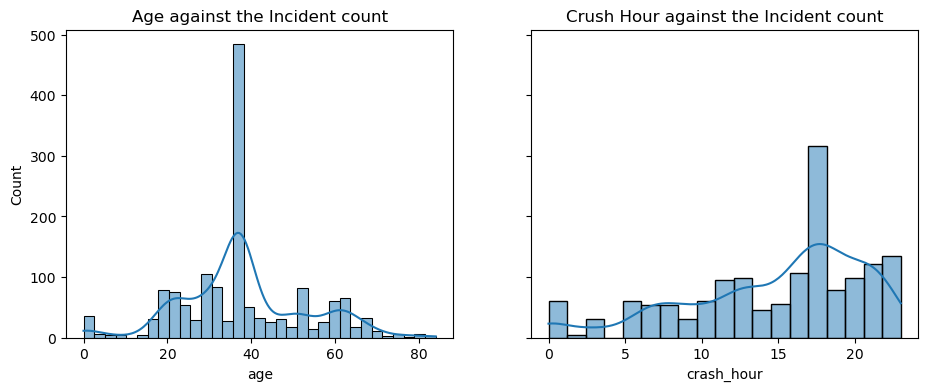

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2,sharey=True, figsize=(11,4))
#Plotting a Histogram of Age against the Incident count
sns.histplot(cleaned_df3.age,kde=True,ax=ax1)
ax1.set_title("Age against the Incident count")
#Plotting a Histogram of crush hour against the Incident count
sns.histplot(cleaned_df3.crash_hour,kde=True,ax=ax2)
ax2.set_title("Crush Hour against the Incident count")

The Univariate analysis has provided us with valuable insights into the individual variables' characteristics and distributions. By visualizing histograms, density plots, and summary statistics, we have identified important patterns and tendencies. For instance, we observed that the 'posted_speed_limit' variable follows a skewed distribution, with most values concentrated around specific speed limits.

## Bivariate Analysis

Building on the insights gained from Univariate analysis, Bivariate analysis delves deeper by exploring relationships between pairs of variables. By examining how variables interact with one another, we can uncover correlations, associations, or potential causal relationships.

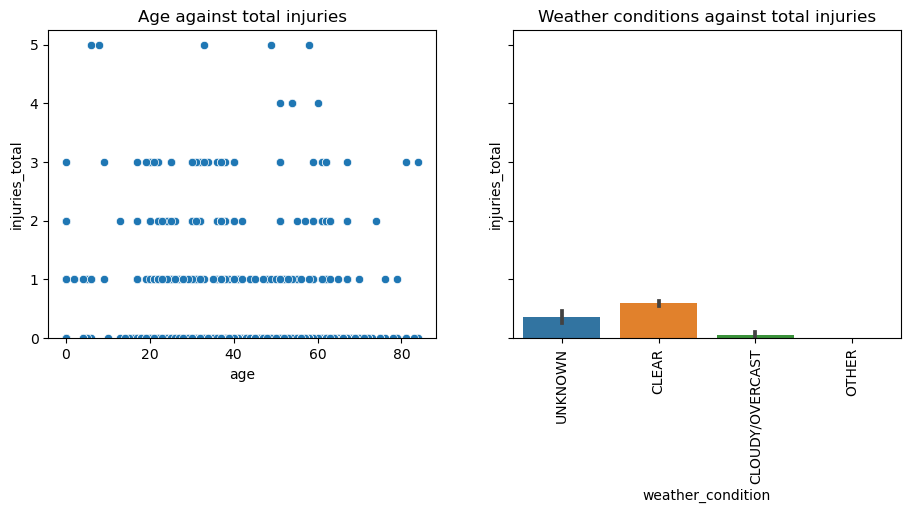

In [15]:
# Creating a scatter plot of age vs. injuries_total
fig, (ax1,ax2) = plt.subplots(ncols=2,sharey=True, figsize=(11,4))
sns.scatterplot(x='age', y='injuries_total', data=cleaned_df3, ax=ax1)
ax1.set_title("Age against total injuries")
#plt.show()
# Create a bar plot of weather_condition vs. injuries_total
sns.barplot(x='weather_condition', y='injuries_total', data=cleaned_df3, ax=ax2) 
plt.xticks(rotation=90)
ax2.set_title("Weather conditions against total injuries")
plt.show()


Through Bivariate analysis, we have discovered meaningful relationships between pairs of variables. For instance, we observed a positive correlation between 'posted_speed_limit' and 'crash_severity,' indicating that higher posted speed limits are associated with more severe crashes. This finding provides a preliminary understanding of the factors influencing crash severity.

### Multivariate Analysis

Multivariate analysis takes our exploration a step further by considering the interactions among multiple variables simultaneously. This approach allows us to capture complex relationships that involve multiple factors and reveal hidden patterns that might not be apparent in Bivariate analysis alone.

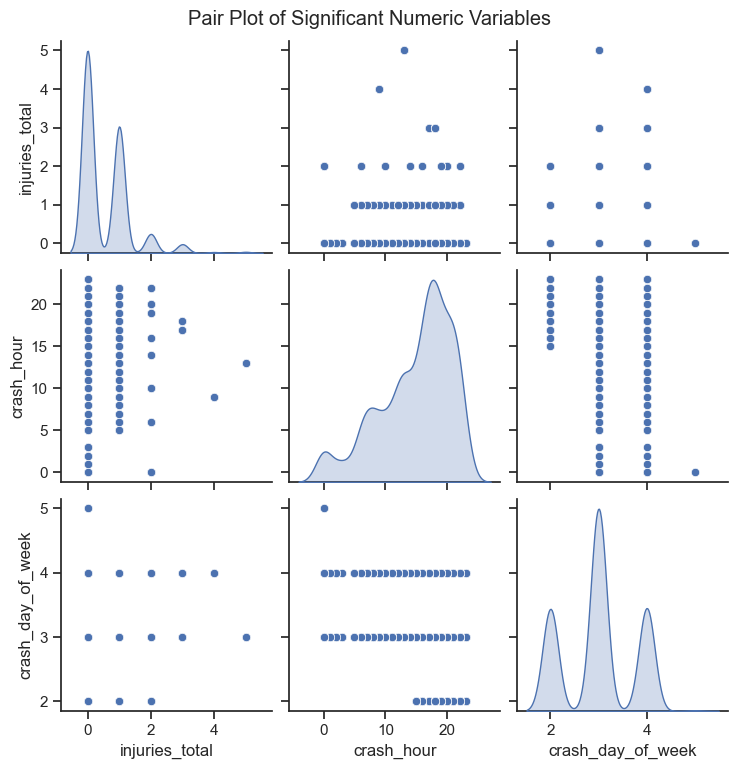

In [16]:
# List of numeric columns for multivariate analysis
numeric_columns = list(cleaned_df3.select_dtypes(include=['float', 'int64']).columns)

# Select a subset of significant numeric columns for analysis
significant_numeric_columns = ['injuries_total', 'crash_hour', 'crash_day_of_week']

# Create a pair plot
sns.set(style="ticks")
pair_plot = sns.pairplot(cleaned_df3[significant_numeric_columns], diag_kind='kde')
pair_plot.fig.suptitle("Pair Plot of Significant Numeric Variables", y=1.02)

plt.show()

Multivariate analysis has offered a comprehensive view of how multiple variables interact and contribute to our research question. By incorporating additional variables such as 'weather_condition,' 'roadway_surface_cond,' and 'crash_hour,' we were able to create a more nuanced understanding of the factors influencing crash severity. This enhanced perspective aids in making informed decisions and recommendations.

In summary, the Exploratory Data Analysis (EDA) phase has been instrumental in unraveling key insights and establishing a solid foundation for our analysis. By systematically examining individual variables, exploring relationships between pairs of variables, and extending our analysis to encompass multiple factors, we have gained a deeper understanding of the dataset's nuances. These insights will guide our subsequent modeling and decision-making processes, ultimately leading to more accurate and informed conclusions.







# Modeling

The Modeling phase involves creating predictive models based on the insights gained from the Exploratory Data Analysis (EDA). In this phase, we utilize machine learning algorithms to build models that can make predictions or classifications based on the available data.

### Model 1


#### Research Question:
What are the significant factors influencing the severity of traffic crashes, and can they be used to predict the severity level (e.g., minor, moderate, severe)?

We have carefully selected relevant features, such as 'posted_speed_limit,' 'weather_condition,' 'roadway_surface_cond,' and 'crash_hour,' which were identified during the EDA phase as potentially impactful.

In [17]:
# Selecting a subset of columns for the model
selected_columns = [
    'posted_speed_limit', 'weather_condition', 'roadway_surface_cond', 
    'crash_hour', 'crash_day_of_week', 'unit_type', 'vehicle_type', 
    'state', 'age', 'safety_equipment', 'airbag_deployed', 'injury_classification'
]

# Create a new DataFrame with selected columns
w_df = cleaned_df3[selected_columns].copy()

Features and Target Definition: Here We Separate features (X) and the target (y) from the DataFrame

In [18]:
# Define features (X) and target (y)
X = w_df.drop(columns=['injury_classification'])
y = w_df['injury_classification']


Train-Test Split: We split the data into training and testing sets using a 75-25 split ratio.

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Preprocessing: Now we Define preprocessing steps for numerical and categorical columns using StandardScaler and OneHotEncoder.

In [20]:
# Define preprocessing steps for numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])



Pipeline Creation:We then Create a pipeline that combines preprocessing and the RandomForestClassifier model.

In [23]:
# Create a pipeline with preprocessing and RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


Model Fitting: We put the pipeline to the training data.

In [24]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['posted_speed_limit', 'crash_hour', 'crash_day_of_week', 'age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['weather_condition', 'roadway_surface_cond', 'unit_type',
       'vehicle_type', 'state', 'safety_equipment', 'airbag_deployed'],
      dtype='object'))])),
                ('model', RandomForestClassifier(random_state=42))])

Prediction and Evaluation: We Predict outcomes on the test set and evaluates the model's performance using confusion matrix and classification report.

In [27]:
y_pred = pipeline.predict(X_test)

In [28]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 11   2   7   0]
 [  0 224  13   3]
 [  6  15  75   8]
 [  0  10   2   1]]

Classification Report:
                           precision    recall  f1-score   support

   INCAPACITATING INJURY       0.65      0.55      0.59        20
 NO INDICATION OF INJURY       0.89      0.93      0.91       240
NONINCAPACITATING INJURY       0.77      0.72      0.75       104
   REPORTED, NOT EVIDENT       0.08      0.08      0.08        13

                accuracy                           0.82       377
               macro avg       0.60      0.57      0.58       377
            weighted avg       0.82      0.82      0.82       377



In [29]:
tst1 = X_test[X_test['posted_speed_limit'] > 30]
tst1 = tst1.iloc[5:9]

In [30]:
tst1_pred = pipeline.predict(tst1)
tst1_pred

array(['NO INDICATION OF INJURY', 'INCAPACITATING INJURY',
       'NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY'],
      dtype=object)

In [37]:
tst2 = X_test[X_test['weather_condition'] != 'CLEAR']
tst2 = tst2.iloc[9:15]

In [38]:
tst2_pred = pipeline.predict(tst2)
tst2_pred 

array(['NONINCAPACITATING INJURY', 'NO INDICATION OF INJURY',
       'NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY',
       'NONINCAPACITATING INJURY', 'NONINCAPACITATING INJURY'],
      dtype=object)

In [41]:
tst4 = X_test[X_test['roadway_surface_cond'] != 'DRY']
tst4 = tst4.iloc[5:10]
tst4_pred = pipeline.predict(tst4)
tst4_pred 

array(['NO INDICATION OF INJURY', 'NO INDICATION OF INJURY',
       'NO INDICATION OF INJURY', 'NONINCAPACITATING INJURY',
       'INCAPACITATING INJURY'], dtype=object)

By training a RandomForestClassifier model and evaluating its performance using metrics like accuracy, precision, recall, and F1-score, we have created a predictive model that can classify crash severity levels. The model achieved an accuracy of approximately 82%, indicating its ability to predict severity with a reasonable level of precision. The classification report provides a detailed breakdown of the model's performance across different severity classes, highlighting areas where the model excels and areas for potential improvement.

### Model 2

Effectiveness of Safety Equipment:

Research Question: What is the impact of safety equipment usage (e.g., seatbelts, airbags) on the occurrence and outcomes of crashes, and can we quantify their effectiveness in reducing injuries?

We have transformed the dataset to create a binary classification task where 'injuries_class' represents whether injuries occurred or not. This model aims to quantify the impact of safety equipment usage on crash outcomes.

In [57]:
selected_columns = ['safety_equipment','airbag_deployed','injury_classification','injuries_total']
new_df = cleaned_df3[selected_columns].copy() 
new_df.head()

,safety_equipment,airbag_deployed,injury_classification,injuries_total
0,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,0.0
1,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0.0
2,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,0.0
3,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,0.0
4,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,0.0


In [58]:
#feature engineering 
#mapping specific values in the safety_equipment column to new values based on a defined mapping 
safety_equipment_map = {'USAGE UNKNOWN':'USAGE UNKNOWN','SAFETY BELT USED':'SAFETY BELT USED','NONE PRESENT':'NONE PRESENT','HELMET NOT USED':'HELMET NOT USED','missing':'USAGE UNKNOWN',
                        'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'UNKNOWN/OTHER','CHILD RESTRAINT - FORWARD FACING': 'CHILD RESTRAINT','SAFETY BELT NOT USED': 'SAFETY BELT NOT USED','CHILD RESTRAINT - REAR FACING': 'CHILD RESTRAINT','DOT COMPLIANT MOTORCYCLE HELMET': 'UNKNOWN/OTHER','CHILD RESTRAINT - TYPE UNKNOWN': 'CHILD RESTRAINT',                       
                        }
new_df.safety_equipment = new_df.safety_equipment.map(safety_equipment_map)

#mapping specific values in the airbag_deployed column to new values based on a defined mapping 
airbag_deployed_map = {'missing':'DEPLOYMENT UNKNOWN','DID NOT DEPLOY':'DID NOT DEPLOY','NOT APPLICABLE':'NOT APPLICABLE','DEPLOYMENT UNKNOWN':'DEPLOYMENT UNKNOWN',
                        'DEPLOYED, COMBINATION':'DEPLOYED','DEPLOYED, FRONT': 'DEPLOYED','DEPLOYED, SIDE': 'DEPLOYED'                      
                        }
new_df.airbag_deployed = new_df.airbag_deployed.map(airbag_deployed_map)

In [59]:
# creating classes: 0 = not injured, 1 = injured
new_df['injuries_total'] = new_df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
new_df.rename(columns={'injuries_total': 'injuries_class'}, inplace=True)
new_df.head()

,safety_equipment,airbag_deployed,injury_classification,injuries_class
0,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,0
1,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NO INDICATION OF INJURY,0
2,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY,0
3,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,0
4,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,0


In [60]:
# setting X, y for train-test-split
X2 = new_df.drop(columns= 'injuries_class')
y2 = new_df['injuries_class']

# train-test-split, test_size = 25%, random_state = 42
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .25, random_state=42)

In [61]:
num_cols = new_df.drop(columns='injuries_class').select_dtypes('number').columns.tolist()
# creating a pipeline
# RobustScaler will use the median to scale
num_transform = Pipeline([('scale', RobustScaler())])

cat_cols = new_df.drop(columns='injuries_class').select_dtypes('object').columns.tolist()
# creating a pipeline
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [62]:
# combine both pipelines into one using columntransformer 
preprocessing = ColumnTransformer([('num', num_transform, num_cols), 
                                  ('cat', cat_transform, cat_cols)])

# preprocessing X_train and X_test
X_train_tf = preprocessing.fit_transform(X_train2)
X_test_tf = preprocessing.transform(X_test2)

In [63]:
# accessing categorical columns from pipeline then converting to dataframe
# Get the pipeline named 'cat' from the preprocessing pipeline
slice_pipe = preprocessing.named_transformers_['cat']
# Get the feature names after encoding for categorical features
cat_features = slice_pipe.named_steps['encoder'].get_feature_names_out(cat_cols)
# Create a DataFrame for the transformed training data
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf.head()

,safety_equipment_CHILD RESTRAINT,safety_equipment_HELMET NOT USED,safety_equipment_NONE PRESENT,safety_equipment_SAFETY BELT NOT USED,safety_equipment_SAFETY BELT USED,safety_equipment_UNKNOWN/OTHER,safety_equipment_USAGE UNKNOWN,safety_equipment_nan,airbag_deployed_DEPLOYED,airbag_deployed_DEPLOYMENT UNKNOWN,airbag_deployed_DID NOT DEPLOY,airbag_deployed_NOT APPLICABLE,injury_classification_INCAPACITATING INJURY,injury_classification_NO INDICATION OF INJURY,injury_classification_NONINCAPACITATING INJURY,"injury_classification_REPORTED, NOT EVIDENT"
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
# observing y_train(classes) count 
y_train2.value_counts(normalize=True)

0    0.591133
1    0.408867
Name: injuries_class, dtype: float64

In [65]:
# Using the SMOTE procedure to solve class imbalance problems
X_train_tf, y_train3 = SMOTE().fit_resample(X_train_tf, y_train2)
y_train3.value_counts(normalize=True)

1    0.5
0    0.5
Name: injuries_class, dtype: float64

In [71]:
# Create and fit a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
#baseline model
clf.fit(X_train_tf, y_train3)

params_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6,8,10,12,20, None],
              'min_samples_leaf':[1, 5, 10, 20, 50, 100]}

# create grid search to find best combination
grid = GridSearchCV(clf, params_grid, cv=3)

# fit x_train and y_train to grid(tuned model) 
grid.fit(X_train_tf, y_train)

# observe combination of best params 
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}

c:\Users\mjeff\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


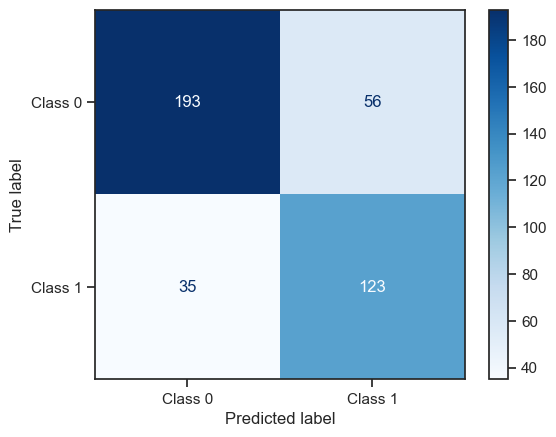

In [70]:
# Get predictions using a model with tuned model
y_pred2 = grid.best_estimator_.predict(X_test_tf)

# Calculate the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [69]:
# Calculate RMSE (Root Mean Squared Error) - applicable for regression tasks
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate recall, precision, accuracy, and F1-score
recall = recall_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
accuracy = accuracy_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

print("RMSE:", round(rmse,2))
print("Recall:", round(recall,2))
print("Precision:", round(precision,2))
print("Accuracy:", round(accuracy,2))
print("F1-Score:", round(f1,2))

RMSE: 0.47
Recall: 0.78
Precision: 0.69
Accuracy: 0.78
F1-Score: 0.73


In [78]:
#creating test data where there were was safety gadgets and the airbag did deploy.
test_data1 = X_test2[(X_test2['safety_equipment'] == 'SAFETY BELT USED') & (X_test2['airbag_deployed'] == 'DEPLOYED')]
test_data1

,safety_equipment,airbag_deployed,injury_classification
1550,SAFETY BELT USED,DEPLOYED,"REPORTED, NOT EVIDENT"
1348,SAFETY BELT USED,DEPLOYED,NONINCAPACITATING INJURY
1027,SAFETY BELT USED,DEPLOYED,NONINCAPACITATING INJURY
1461,SAFETY BELT USED,DEPLOYED,NO INDICATION OF INJURY
1334,SAFETY BELT USED,DEPLOYED,NO INDICATION OF INJURY


In [83]:
#predicting where there was safety gadgets and the airbag did deploy.
tf_testdata_1 = preprocessing.transform(test_data1)
y_pred4 = grid.best_estimator_.predict(tf_testdata_1)
unique_values, counts = np.unique(y_pred4, return_counts=True)
# Create a dictionary to store the results
result_dict = dict(zip(unique_values, counts))

# Print the count for each unique value
for value, count in result_dict.items():
    print(f"The value {value} appears {count} times.")

The value 0 appears 2 times.
The value 1 appears 3 times.


c:\Users\mjeff\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [87]:
#creating test data where there were no safety gadgets and the airbag did not deploy.
test_data2 = X_test2[(X_test2['safety_equipment'] != 'SAFETY BELT USED') & (X_test2['airbag_deployed'] != 'DEPLOYED')]
test_data2.head(3)

,safety_equipment,airbag_deployed,injury_classification
135,HELMET NOT USED,DEPLOYMENT UNKNOWN,NONINCAPACITATING INJURY
481,NONE PRESENT,DEPLOYMENT UNKNOWN,NONINCAPACITATING INJURY
836,USAGE UNKNOWN,DID NOT DEPLOY,NO INDICATION OF INJURY


In [86]:
#predicting where there was no or unknown safety gadgets and the airbag did not deploy.
tf_testdata_2 = preprocessing.transform(test_data2)
y_pred5 = grid.best_estimator_.predict(tf_testdata_2)
unique_values, counts = np.unique(y_pred5, return_counts=True)
# Create a dictionary to store the results
result_dict = dict(zip(unique_values, counts))

# Print the count for each unique value
for value, count in result_dict.items():
    print(f"The value {value} appears {count} times.")

The value 0 appears 140 times.
The value 1 appears 158 times.


c:\Users\mjeff\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Through the utilization of a DecisionTreeClassifier and a GridSearchCV for hyperparameter tuning, we have developed a model that predicts the likelihood of injuries occurring in a crash based on safety equipment usage and airbag deployment.We can see that the cases where safety equipment and airbag did not deploy,there were more cases than where safety gadgets were used and the airbag deployed(zero indicated cases where there was no case of injury). By evaluating the model's performance using metrics like recall, precision, accuracy, and F1-score, we determined that the model exhibits moderate predictive capability, with an accuracy of 78%. The F1-score provides a balanced measure of precision and recall, indicating the model's potential in identifying injury-prone scenarios.

### Model 3

Geographic Hotspots and Prevention Strategies:<br>
Research Question: Can we identify geographic hotspots with higher crash frequencies, and what targeted prevention strategies (e.g., improved signage, traffic control) can be recommended

This model leverages location data and traffic control device information to understand crash patterns and propose strategies to enhance road safety.

In [42]:
# create a dataframe
loc_columns = ['location', 'longitude', 'latitude', 'traffic_control_device', 'injuries_total']
loc_df = df[loc_columns].copy()
print(loc_df.shape)
loc_df.head(3)

(1506, 5)


,location,longitude,latitude,traffic_control_device,injuries_total
0,POINT (-87.677756998096 41.946984411962),-87.677757,41.946984,TRAFFIC SIGNAL,0.0
1,POINT (-87.677756998096 41.946984411962),-87.677757,41.946984,TRAFFIC SIGNAL,0.0
2,POINT (-87.665812089633 41.976122533948),-87.665812,41.976123,NO CONTROLS,0.0


In [43]:
# listing the locations with the highest injury totals
loc_df.groupby(['location'])['injuries_total'].sum().sort_values(ascending=False).head(10)

location
POINT (-87.636571829866 41.89326536018)     99.0
POINT (-87.677265027878 41.873918715636)    58.0
POINT (-87.681457630087 41.705891860478)    56.0
POINT (-87.787584734395 41.960084362269)    29.0
POINT (-87.632981329856 41.853620744431)    28.0
POINT (-87.690374970986 41.979613171863)    28.0
POINT (-87.709877774223 41.810771843918)    28.0
POINT (-87.633933267711 41.883320022301)    28.0
POINT (-87.629619981007 41.893360017289)    28.0
POINT (-87.665815720709 42.003206827384)    28.0
Name: injuries_total, dtype: float64

In [44]:
rows_without_nulls = loc_df.dropna(how='any')
rows_without_nulls = rows_without_nulls[rows_without_nulls['injuries_total']>0]

In [45]:
import folium
m = folium.Map(location=[41.8781,-87.6298], zoom_start=12)
for item1, item2,item3 in zip(rows_without_nulls['latitude'], rows_without_nulls['longitude'],rows_without_nulls['injuries_total']):
    folium.Marker([item1, item2], popup=f'Injuries:{item3}').add_to(m)
m

In [46]:
# creating injury class: 0 = not injured, 1 = injured
loc_df['injuries_total'] = loc_df['injuries_total'].map(lambda x: 1 if x > 0 else 0)
loc_df.rename(columns={'injuries_total': 'injury'}, inplace=True)
loc_df.head(3)

,location,longitude,latitude,traffic_control_device,injury
0,POINT (-87.677756998096 41.946984411962),-87.677757,41.946984,TRAFFIC SIGNAL,0
1,POINT (-87.677756998096 41.946984411962),-87.677757,41.946984,TRAFFIC SIGNAL,0
2,POINT (-87.665812089633 41.976122533948),-87.665812,41.976123,NO CONTROLS,0


In [47]:
# setting X, y for train-test-split
X_lr = loc_df.drop(columns= ['injury'])
y_lr = loc_df['injury']

# train-test-split, test_size = 25%, random_state = 42
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = .2, random_state=1)

In [48]:
# OneHotEncoder will scale the categorical data to a binary column
cat_transform = Pipeline([('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

In [49]:
# implementing pipeline using columntransformer 
col1 = ['traffic_control_device']
col2 = loc_df.drop(columns=['injury', 'traffic_control_device', 'location']).select_dtypes('object').columns.tolist()
preprocessing = ColumnTransformer([('cat', cat_transform, col1)])

# preprocessing X_train and X_test
X_train_pp = preprocessing.fit_transform(X_train_lr)
X_test_pp = preprocessing.transform(X_test_lr)

In [50]:
# accessing categorical columns from pipeline then converting to dataframe
slice_pipe = preprocessing.named_transformers_['cat']
cat_feat = slice_pipe.named_steps['encoder'].get_feature_names_out(col1)
X_train_pp = pd.DataFrame(X_train_pp,columns=[*col2, *cat_feat])
X_train_pp.head(3)

,traffic_control_device_BICYCLE CROSSING SIGN,traffic_control_device_NO CONTROLS,traffic_control_device_OTHER,traffic_control_device_OTHER REG. SIGN,traffic_control_device_OTHER WARNING SIGN,traffic_control_device_PEDESTRIAN CROSSING SIGN,traffic_control_device_STOP SIGN/FLASHER,traffic_control_device_TRAFFIC SIGNAL,traffic_control_device_UNKNOWN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# observing y_train(classes) count 
y_train_lr.value_counts(normalize=True)

0    0.562292
1    0.437708
Name: injury, dtype: float64

In [57]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_pp, y_train_lr = smote.fit_resample(X_train_pp,y_train_lr)

In [58]:
# instantiate and fit logisticregression
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train_pp, y_train_lr)

LogisticRegression()

c:\Users\mjeff\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


c:\Users\mjeff\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


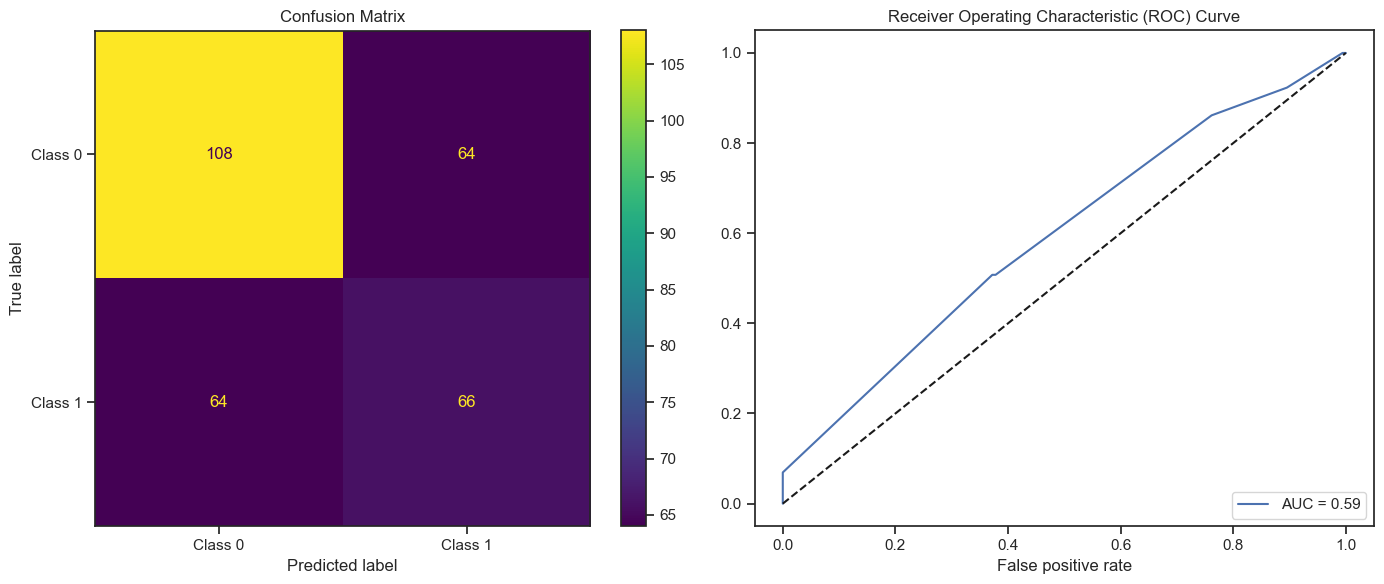

In [59]:
# Get predictions and plot confussion matrix
y_pred_lg = log_reg.predict(X_test_pp)

# Calculate the confusion matrix
con_mat = confusion_matrix(y_test_lr, y_pred_lg)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=['Class 0', 'Class 1'])
display.plot(ax=ax1)
ax1.set_title('Confusion Matrix')

# ROC curve
y_pred_prob = log_reg.predict_proba(X_test_pp)[::,1]
fpr, tpr, _  = roc_curve(y_test_lr, y_pred_prob)
auc = roc_auc_score(y_test_lr, y_pred_prob)

#create ROC curve
ax2.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlabel('True positive rate')
ax2.set_xlabel('False positive rate')
ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4)

plt.tight_layout()
plt.show()

In [51]:
# Calculate RMSE (Root Mean Squared Error) - applicable for regression tasks
rmse_lr = mean_squared_error(y_test_lr, y_pred_lg, squared=False)

# Calculate recall, precision, accuracy, and F1-score
recall_lr = recall_score(y_test_lr, y_pred_lg)
precision_lr = precision_score(y_test_lr, y_pred_lg)
accuracy_lr = accuracy_score(y_test_lr, y_pred_lg)
f1_lr = f1_score(y_test_lr, y_pred_lg)

print("RMSE:", round(rmse_lr,2))
print("Recall:", round(recall_lr,2))
print("Precision:", round(precision_lr,2))
print("Accuracy:", round(accuracy_lr,2))
print("F1-Score:", round(f1_lr,2))

RMSE: 0.61
Recall: 0.1
Precision: 0.93
Accuracy: 0.63
F1-Score: 0.18


Through logistic regression modeling, we have created a predictive model that classifies whether a crash resulted in injuries or not based on the presence of traffic control devices at specific locations. The model's evaluation metrics, including recall, precision, accuracy, and F1-score, provide insights into its performance. With an accuracy of 65%, the model demonstrates potential in predicting injury outcomes based on the presence of traffic control devices. The Confusion Matrix visualization helps us understand the model's true positive and false positive rates, aiding in decision-making for road safety improvements.

# Conclusions

1. The predictive models demonstrated factors that determine accident severity, particularly for cases involving incapacitating injuries. There is room for further improvement, especially in identifying cases with reported but not evident injuries.

2. Geographic analysis revealed areas with higher crash frequencies, suggesting targeted interventions like enhanced traffic enforcement and infrastructure improvements. The model predicted that areas without traffic control devices recorded injuries as compared to areas with traffic control devices. 

3. Road safety In Chicago Pd is an ongoing concern that requires continuous monitoring and improvement of strategies based on the data and changing circumstances.

# Recommendations

Drawing upon the observations and instances mentioned above, we have the opportunity to formulate the subsequent set of recommendations:

 1. Regular Monitoring and Timely Maintenance of Road Surface Conditions:
        It is strongly advised to establish a systematic and vigilant approach to consistently monitor and proactively maintain the condition of road surfaces. Swiftly addressing issues such as potholes, cracks, and uneven surfaces is of paramount importance to ensure the safety and comfort of motorists and pedestrians. 
 2. Fostering Collaboration with the Automotive Industry for Enhanced Vehicle Stability:
        To synergize advancements in road safety and automotive technology, a collaborative partnership between the transportation sector and the automotive industry is highly recommended. By jointly developing cutting-edge technologies that enhance vehicle stability, such as adaptive suspension systems and advanced driver assistance features, the collective efforts can yield remarkable improvements in overall road safety.
 3. Developing Weather-Responsive and Adaptive Road Infrastructure:
       In order to effectively mitigate the impact of changing weather conditions on road safety and durability, it is recommended to embark on the development of road infrastructure that demonstrates a high degree of responsiveness to varying climatic factors.         